# USED CAR PREDICTION MACHINE LEARNING PROJECT
![](https://i.ytimg.com/vi/0vULT-2AxkI/maxresdefault.jpg)

**Purpose:** The purpose of this project is to use the provided data and apply different model of machine learning such as Logistic Regression, Decision Tree, and Random Forest in order to predict if the used car is a bad buy.

- The process involved loading data, processing date data, data analysis, preparing data for training, training different model, evaluation, tuning hyperparameters, conclusion of the best model, prediction of the test data, and saving the model.

## 1. Load Data

In [190]:
!pip install jovian opendatasets numpy xgboost graphviz lightgbm scikit-learn lightgbm --upgrade --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.54.0 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


In [191]:
import os
import opendatasets as od
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

In [3]:
od.download('https://www.kaggle.com/c/DontGetKicked')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: thinhdnguyen
Your Kaggle Key: ········


100%|██████████| 10.2M/10.2M [00:00<00:00, 47.2MB/s]



Extracting archive ./DontGetKicked/DontGetKicked.zip to ./DontGetKicked


In [4]:
os.listdir('DontGetKicked')

['test.csv',
 'test.zip',
 'training.csv',
 'example_entry.csv',
 'training.zip',
 'Carvana_Data_Dictionary.txt']

In [5]:
raw_df = pd.read_csv('./DontGetKicked/training.csv');
test_df = pd.read_csv('./DontGetKicked/test.csv')

In [6]:
raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


## 2. General Information from Data

In [7]:
text_file = open('./DontGetKicked/Carvana_Data_Dictionary.txt')
file_content = text_file.read()
print(file_content)
text_file.close()

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [9]:
raw_df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


**Comment:** 
- No null value for the column IsBadBuy.
- Most data type is either float, int, or object.
- There is date data needing to be processed.
- No need of Ref ID column
- Range of each column is reasonable.

## 3. Process Purchased Date Variable

**Purpose:** To convert date data to separate year and month. As a result, the PurchDate column will not be needed in future.

In [10]:
def split_date(df):
    df['PurchDate'] = pd.to_datetime(df['PurchDate'])
    df['PurchYear'] = df.PurchDate.dt.year
    df['PurchMonth'] = df.PurchDate.dt.month

In [11]:
split_date(raw_df)
split_date(test_df)

In [12]:
raw_df

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,2009,12
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,2009,12
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,2009,12
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,2009,12
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,2009,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,2009-12-02,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993,2009,12
72979,73011,0,2009-12-02,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038,2009,12
72980,73012,0,2009-12-02,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893,2009,12
72981,73013,0,2009-12-02,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974,2009,12


## 4. Data Analysis
**Purpose:** To perform some visualizations and some comments on the data set.

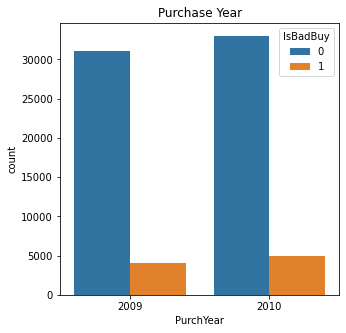

In [13]:
plt.figure(figsize=(5,5))
plt.title('Purchase Year')
sns.countplot(x=raw_df.PurchYear,hue=raw_df.IsBadBuy);

**Comment:** The number of used car purchase increased from 2009 to 2010. Moreover, the number of buying a bad used car also increased.

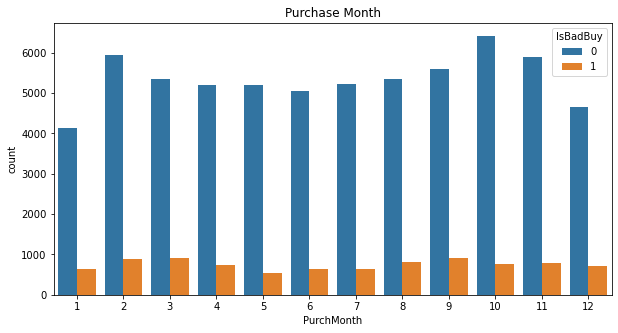

In [14]:
plt.figure(figsize=(10,5))
plt.title('Purchase Month')
sns.countplot(x=raw_df.PurchMonth,hue=raw_df.IsBadBuy);

**Comment:** October, November, and February had a high number of purchasing used car. However, March and September had high number of purchasing a bad used car.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


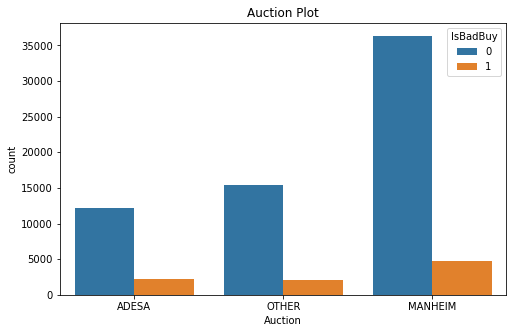

In [15]:
plt.figure(figsize=(8,5))
plt.title('Auction Plot')
sns.countplot(raw_df.Auction,hue=raw_df.IsBadBuy);

**Comment:** Auction having the highest number of bad used car is MANHEIM.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


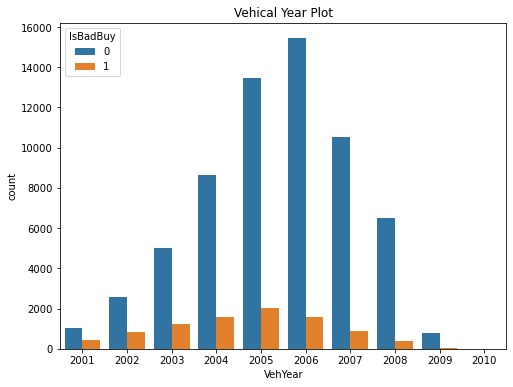

In [16]:
plt.figure(figsize=(8,6));
plt.title('Vehical Year Plot');
sns.countplot(raw_df.VehYear,hue=raw_df.IsBadBuy);

**Comment:** The 2005 and 2007 used vehicles had higher number of purchase. The 2005 used vehicle had the highest chance of being a bad buy.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


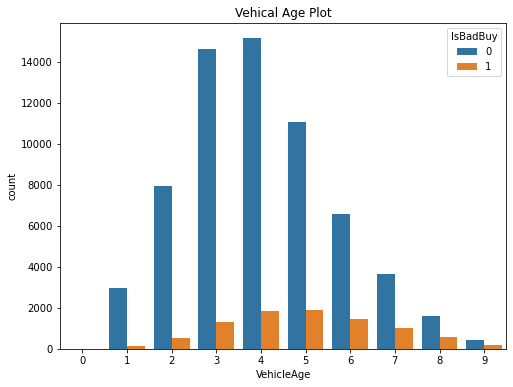

In [17]:
plt.figure(figsize=(8,6));
plt.title('Vehical Age Plot');
sns.countplot(raw_df.VehicleAge,hue=raw_df.IsBadBuy);

**Comment:**

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


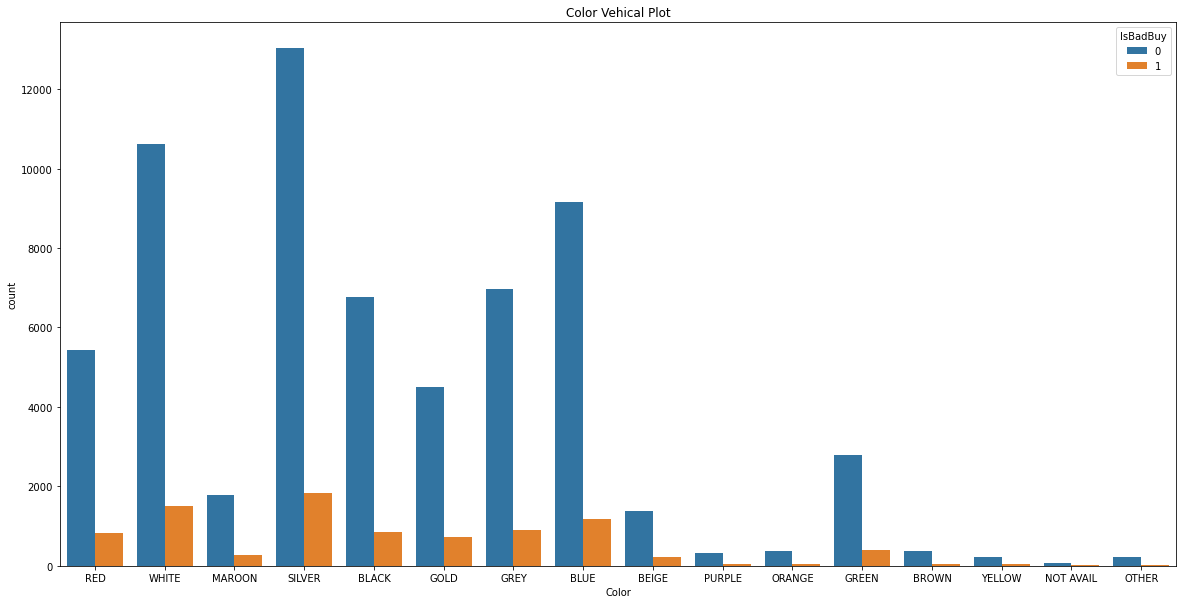

In [18]:
plt.figure(figsize=(20,10));
plt.title('Color Vehical Plot');
sns.countplot(raw_df.Color,hue=raw_df.IsBadBuy);

**Comment:** The silver and white used vehicles had higher number of purchase and higher chance of being a bad buy.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


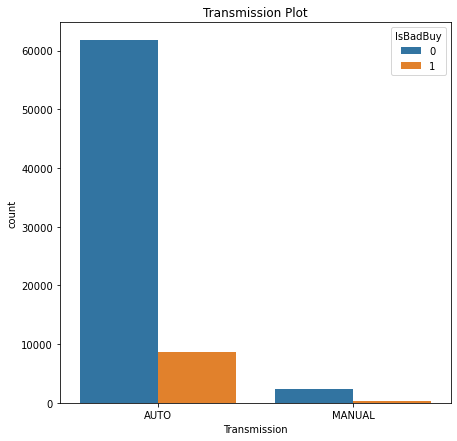

In [19]:
raw_df['Transmission'] = raw_df['Transmission'].replace(['Manual'],'MANUAL');
plt.figure(figsize=(7,7));
plt.title('Transmission Plot');
sns.countplot(raw_df.Transmission,hue=raw_df.IsBadBuy);

**Comment:** Auto transmission used vehicles had higher number of purchase as well as being a bad buy

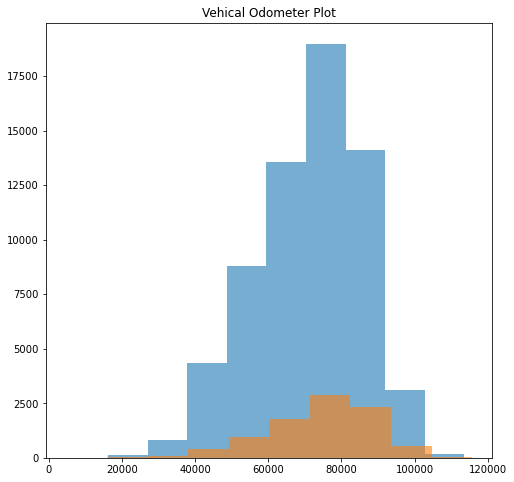

In [20]:
plt.figure(figsize=(8,8));
plt.title('Vehical Odometer Plot');
Good_df = raw_df.VehOdo[raw_df.IsBadBuy == 0];
Bad_df = raw_df.VehOdo[raw_df.IsBadBuy == 1];
plt.hist(Good_df,alpha=0.6,bins=10);
plt.hist(Bad_df,alpha=0.6,bins=10);

**Comment:** Most purchased vehicles had odometer around 80000. The average odometer of bad car is the same as normal car.

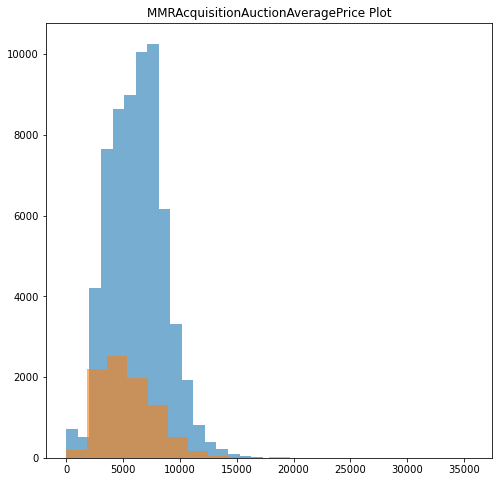

In [21]:
plt.figure(figsize=(8,8));
plt.title('MMRAcquisitionAuctionAveragePrice Plot');
Good_df = raw_df.MMRAcquisitionAuctionAveragePrice[raw_df.IsBadBuy == 0];
Bad_df = raw_df.MMRAcquisitionAuctionAveragePrice[raw_df.IsBadBuy == 1];
plt.hist(Good_df,alpha=0.6,bins=20);
plt.hist(Bad_df,alpha=0.6,bins=20);

In [22]:
print(file_content)

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

**Comment:** Acquisition price for this vehicle in average condition at time of purchase was about 7500. The price of a bad car was about lower than normal car.

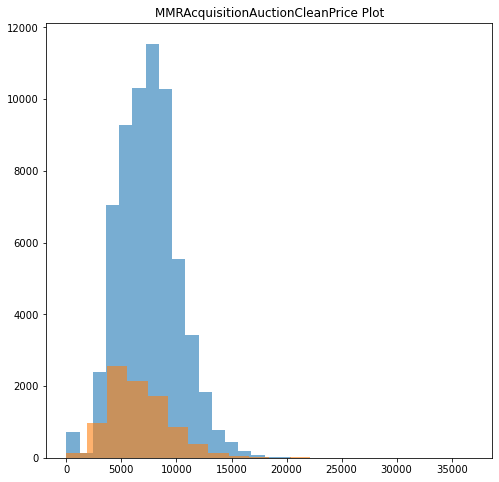

In [23]:
plt.figure(figsize=(8,8));
plt.title('MMRAcquisitionAuctionCleanPrice Plot');
Good_df = raw_df.MMRAcquisitionAuctionCleanPrice[raw_df.IsBadBuy == 0];
Bad_df = raw_df.MMRAcquisitionAuctionCleanPrice[raw_df.IsBadBuy == 1];
plt.hist(Good_df,alpha=0.6,bins=20);
plt.hist(Bad_df,alpha=0.6,bins=20);

**Comment:** Acquisition price for this vehicle in the above Average condition at time of purchase was about 9000. The price of a bad car was about lower than normal car (about 5000).

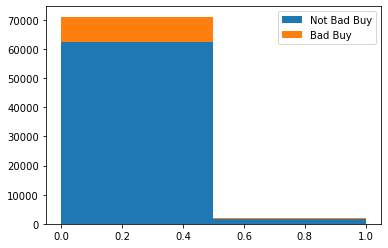

In [24]:
plt.hist([raw_df.IsOnlineSale[raw_df.IsBadBuy==0],raw_df.IsOnlineSale[raw_df.IsBadBuy==1] ],bins = 2,  
         stacked=True);
plt.legend(['Not Bad Buy','Bad Buy']);

**Comment:** It seems that online sale had lower chance of buying a bad car. However, number of purchasing used car through online was very low.

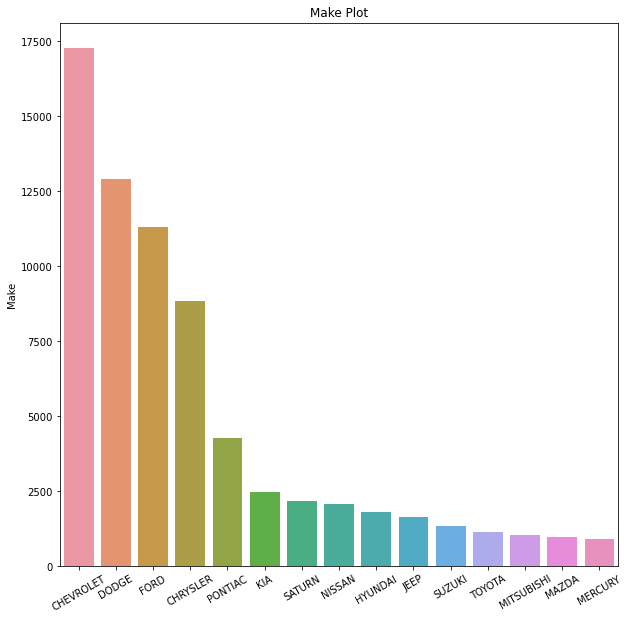

In [25]:
plt.figure(figsize=(10,10));
plt.title('Make Plot');
df = pd.DataFrame(raw_df.Make.value_counts().sort_values(ascending = False).head(15));
sns.barplot(x= df.index,y=df.Make);
plt.xticks(rotation = 30);

**Comment:** CHEVROLET AND DODGE had higher number of purchasing used car.

### Correlation Coefficient

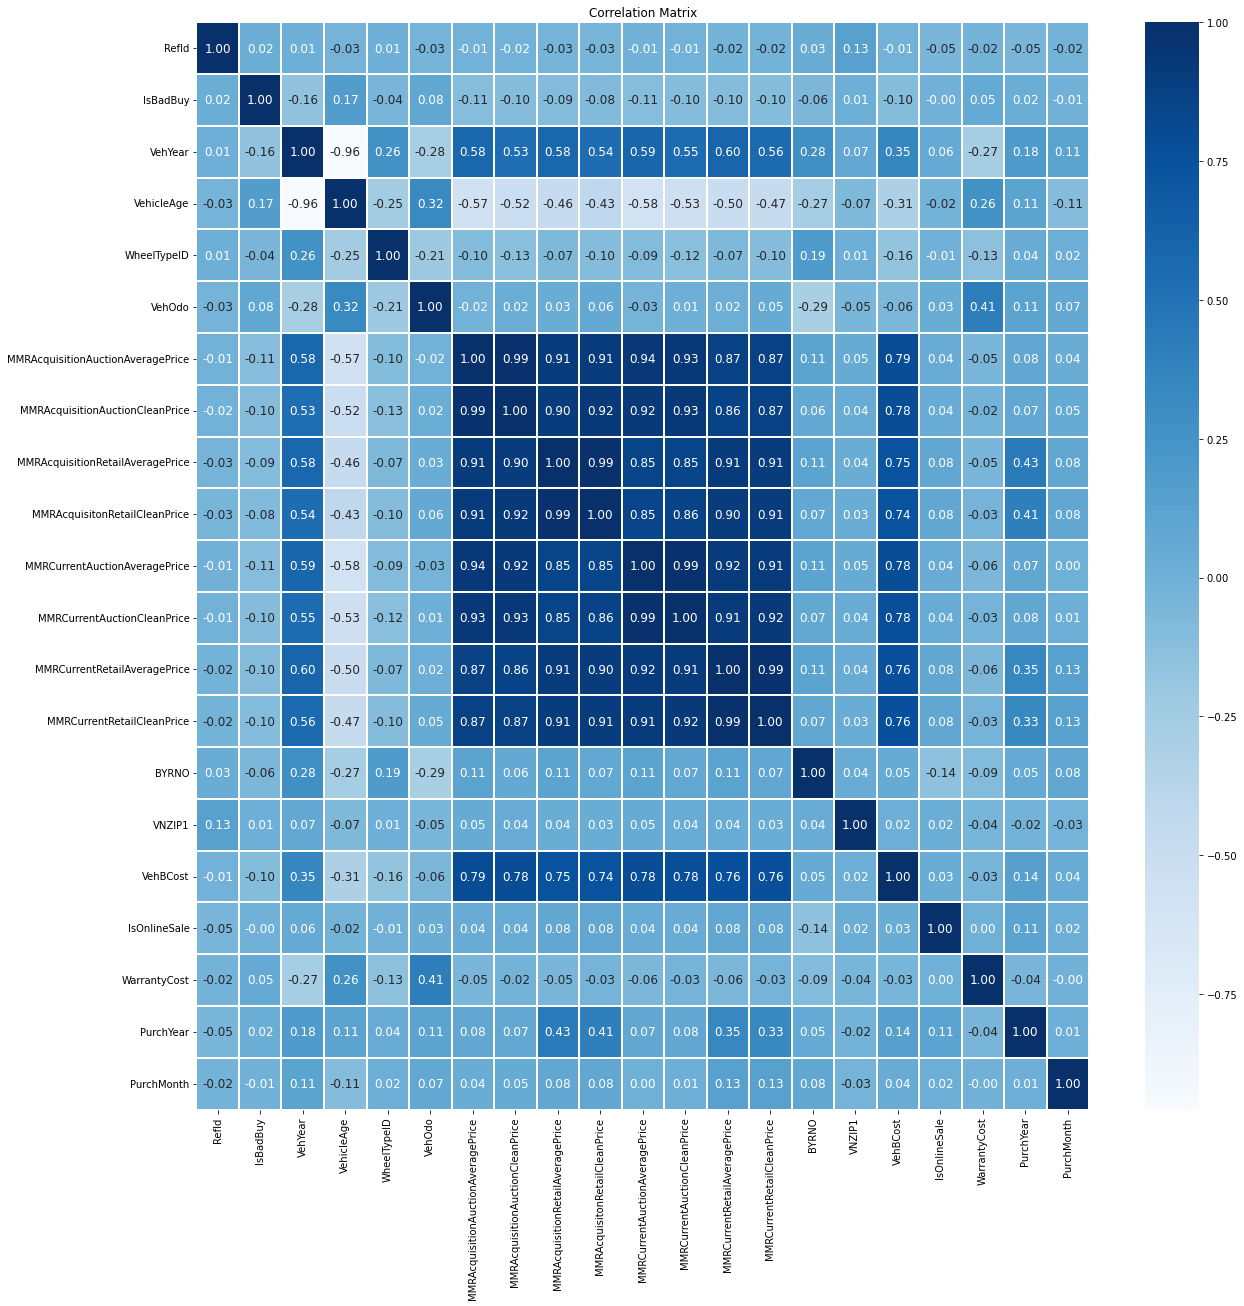

In [26]:
plt.figure(figsize=(20,20));
sns.heatmap(raw_df.corr(), cmap='Blues', annot=True,fmt='.2f', linewidths=.2,annot_kws={"fontsize":12})
plt.title('Correlation Matrix');

**Comment:** Among numeric variables, it seems that vehicle age, vehicle year, 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice' had strong relationship with a chance of buying bad car.

## 5. Clean and Prepare Data

In [27]:
# Dont need Purchase Date
input_cols = list(raw_df.columns)[3:];
target_col = 'IsBadBuy';

In [28]:
inputs_df, targets = raw_df[input_cols].copy(), raw_df[target_col].copy()

In [29]:
test_inputs = test_df[input_cols].copy();

In [30]:
import numpy as np
numeric_cols = raw_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df[input_cols].select_dtypes(include='object').columns.tolist()

In [31]:
print(numeric_cols)

['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost', 'IsOnlineSale', 'WarrantyCost', 'PurchYear', 'PurchMonth']


In [32]:
print(categorical_cols)

['Auction', 'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission', 'WheelType', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']


### a. Numeric Columns

#### Imputing

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(inputs_df[numeric_cols])

In [34]:
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

#### Scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])

In [36]:
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [37]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,PurchYear,PurchMonth
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### b. Category Columns

In [38]:
inputs_df[categorical_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Auction               72983 non-null  object
 1   Make                  72983 non-null  object
 2   Model                 72983 non-null  object
 3   Trim                  70623 non-null  object
 4   SubModel              72975 non-null  object
 5   Color                 72975 non-null  object
 6   Transmission          72974 non-null  object
 7   WheelType             69809 non-null  object
 8   Nationality           72978 non-null  object
 9   Size                  72978 non-null  object
 10  TopThreeAmericanName  72978 non-null  object
 11  PRIMEUNIT             3419 non-null   object
 12  AUCGUART              3419 non-null   object
 13  VNST                  72983 non-null  object
dtypes: object(14)
memory usage: 7.8+ MB


**Note:** Model, Trim, and Submodel were too many for machine to learn. There is no need of WheelType because of WheelTypeID in numeric columns.

In [39]:
categorical_cols = ['Auction', 'Make','Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName', 'PRIMEUNIT', 'AUCGUART', 'VNST']

In [40]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols]);
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy

## 6. Create Validation Set

In [80]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.2, random_state=42)

## 7. Logistic Regression

### a. Training

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
Log1 = LogisticRegression(solver='liblinear');

In [117]:
%%time
Log1.fit(train_inputs, train_targets)

CPU times: user 1.31 s, sys: 21.1 ms, total: 1.33 s
Wall time: 1.33 s


LogisticRegression(solver='liblinear')

### b. Evaluation

In [118]:
from sklearn.metrics import accuracy_score

In [194]:
accuracy_trains = [];
accuracy_vals = [];
FN_trains = [];
FN_vals = [];

def predict_and_plot(inputs, targets, model,name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    
    if name == "Training":
        accuracy_trains.append(accuracy)
        FN_trains.append(cf[1][0])
    else:
        accuracy_vals.append(accuracy)
        FN_vals.append(cf[1][0])
        
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 87.62%


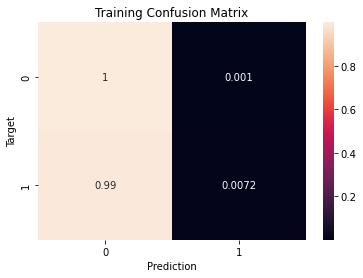

In [195]:
Log1_train_preds = predict_and_plot(train_inputs, train_targets, Log1, 'Training')

Accuracy: 88.11%


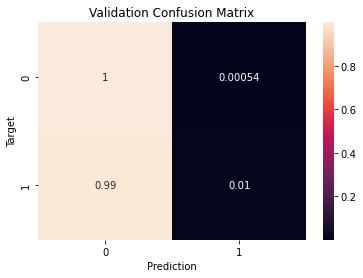

In [196]:
Log1_val_preds = predict_and_plot(val_inputs, val_targets, Log1, 'Validation')

### c. Different Methods

#### 1. Newton-cg

In [198]:
Log2 = LogisticRegression(solver='newton-cg');
Log2.fit(train_inputs, train_targets)

LogisticRegression(solver='newton-cg')

Accuracy: 87.62%


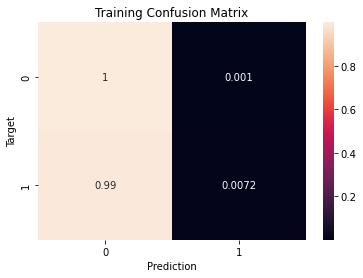

In [199]:
Log2_train_preds = predict_and_plot(train_inputs, train_targets, Log2, 'Training')

Accuracy: 88.11%


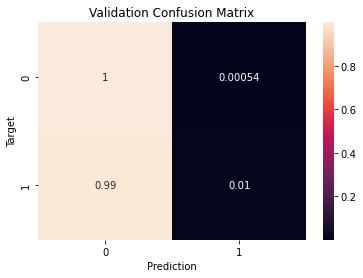

In [200]:
Log2_val_preds = predict_and_plot(val_inputs, val_targets, Log2, 'Validation')

#### 2. sag Method

In [201]:
Log3 = LogisticRegression(solver='sag');
Log3.fit(train_inputs, train_targets)

LogisticRegression(solver='sag')

Accuracy: 87.62%


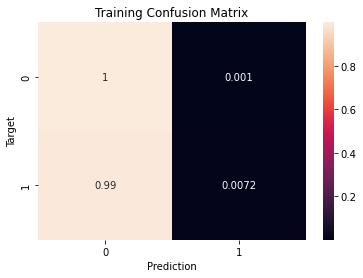

In [202]:
Log3_train_preds = predict_and_plot(train_inputs, train_targets, Log3, 'Training')

Accuracy: 88.11%


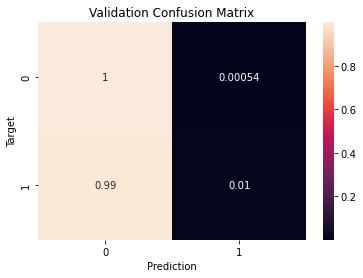

In [203]:
Log3_val_preds = predict_and_plot(val_inputs, val_targets, Log3, 'Validation')

### e. Conclusion

- Three methods in logistic regression yielded the same accuracy score 88.11% for validation set. However, the false negative is too high, which is 0.99 for validation set. It is not good for prediction.

## 7. DECISION TREE

### a. Training

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
tree_1 = DecisionTreeClassifier(random_state=42)

In [131]:
%%time
tree_1.fit(train_inputs, train_targets)

CPU times: user 2.17 s, sys: 2.18 ms, total: 2.18 s
Wall time: 2.18 s


DecisionTreeClassifier(random_state=42)

### b. Evaluation

Accuracy: 100.00%


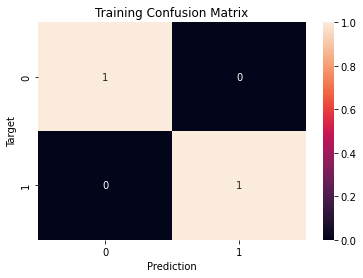

In [204]:
tree1_train_preds = predict_and_plot(train_inputs, train_targets, tree_1, 'Training')

Accuracy: 81.71%


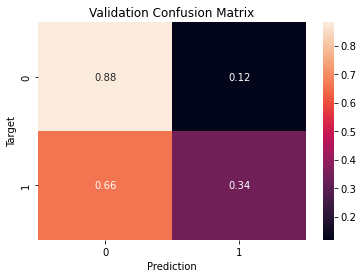

In [205]:
tree1_val_preds = predict_and_plot(val_inputs, val_targets, tree_1, 'Validation')

**Comment:** It seems the decision tree model is overfitting.

### c. Tuning Hyperparameter

In [134]:
def test_para(**paras):
    model = DecisionTreeClassifier(random_state = 42, **paras).fit(train_inputs,train_targets)
    train_acc = accuracy_score(model.predict(train_inputs),train_targets)
    val_acc = accuracy_score(model.predict(val_inputs),val_targets)
    return train_acc,val_acc
def test_param_and_plot(param_name, param_values):
    train_accs, val_accs = [], [] 
    for value in param_values:
        paras = {param_name: value}
        train_acc, val_acc = test_para(**paras)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, val_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy Score')
    plt.legend(['Training', 'Validation'])

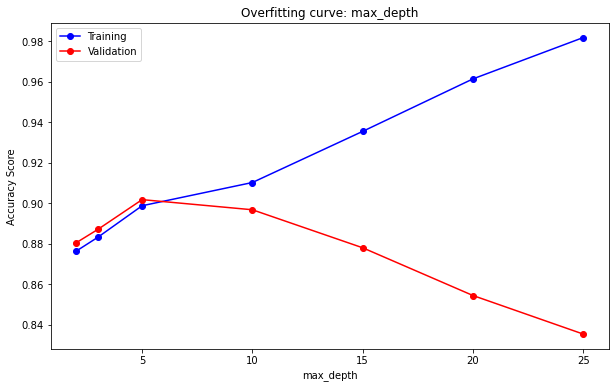

In [135]:
test_param_and_plot('max_depth', [2,3,5, 10, 15, 20, 25])

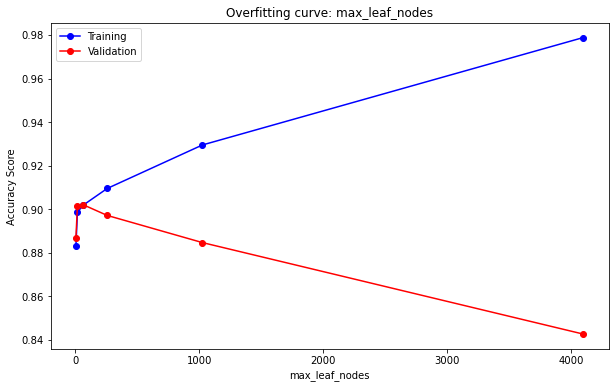

In [136]:
test_param_and_plot('max_leaf_nodes', [2**2,2**4,2**6,2**8,2**10,2**12])

### d. Improved Decision Tree

In [137]:
tree_2 = DecisionTreeClassifier(random_state=42,max_leaf_nodes=2**6,max_depth = 5);
tree_2.fit(train_inputs, train_targets);

Accuracy: 89.87%


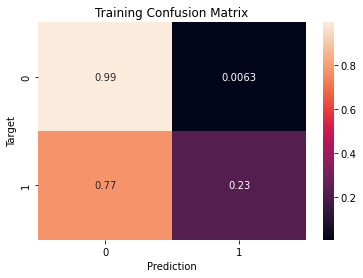

In [206]:
tree2_train_preds = predict_and_plot(train_inputs, train_targets, tree_2, 'Training')

Accuracy: 90.17%


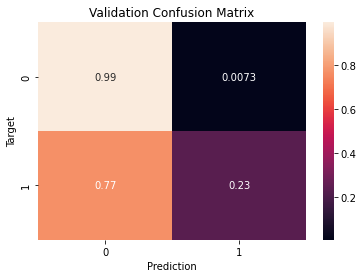

In [207]:
tree2_val_preds = predict_and_plot(val_inputs, val_targets, tree_2, 'Validation')

### e. Conclusion

- With tuning hyperparameters, the accuracy score went up from 81.71% to 90.17%, which is quiet good. Compared with Logistic model, the false negative went down from 0.99 to 0.77. Therefore, decision tree model is definitely better than logistic model.

## 8. RANDOM FOREST

### a. Training

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rf1 = RandomForestClassifier(n_jobs = -1,random_state=42)

In [142]:
%%time
rf1.fit(train_inputs,train_targets)

CPU times: user 14.5 s, sys: 46 ms, total: 14.5 s
Wall time: 7.35 s


RandomForestClassifier(n_jobs=-1, random_state=42)

### b. Evaluation

Accuracy: 99.99%


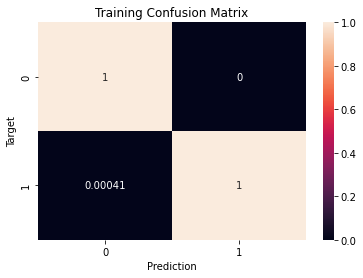

In [208]:
rf1_train_preds = predict_and_plot(train_inputs, train_targets, rf1, 'Training')

Accuracy: 89.14%


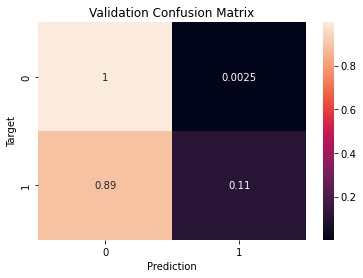

In [209]:
rf1_val_preds = predict_and_plot(val_inputs, val_targets, rf1, 'Validation')

### c. Hyperparameter Tuning

In [145]:
def test_para(**paras):
    model = RandomForestClassifier(random_state = 42, **paras).fit(train_inputs,train_targets)
    train_acc = accuracy_score(model.predict(train_inputs),train_targets)
    val_acc = accuracy_score(model.predict(val_inputs),val_targets)
    return train_acc,val_acc
def test_param_and_plot(param_name, param_values):
    train_accs, val_accs = [], [] 
    for value in param_values:
        paras = {param_name: value}
        train_acc, val_acc = test_para(**paras)
        train_accs.append(train_acc)
        val_accs.append(val_acc)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accs, 'b-o')
    plt.plot(param_values, val_accs, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy Score')
    plt.legend(['Training', 'Validation'])

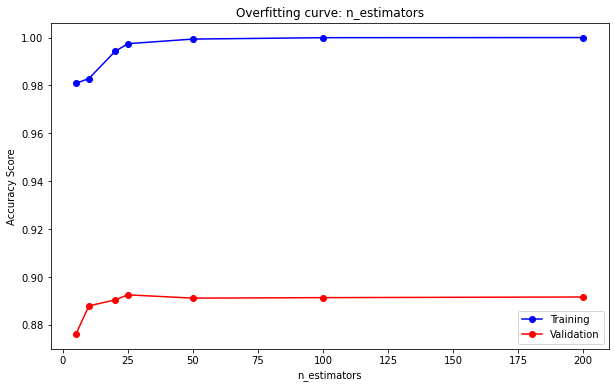

In [146]:
test_param_and_plot('n_estimators', [5,10,20,25,50,100,200])

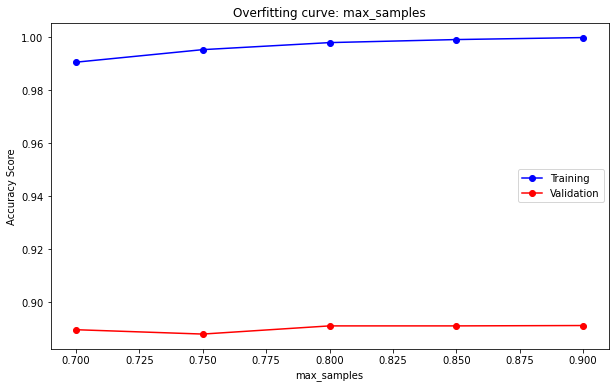

In [147]:
test_param_and_plot('max_samples', [0.7,0.75,0.8,0.85,0.9])

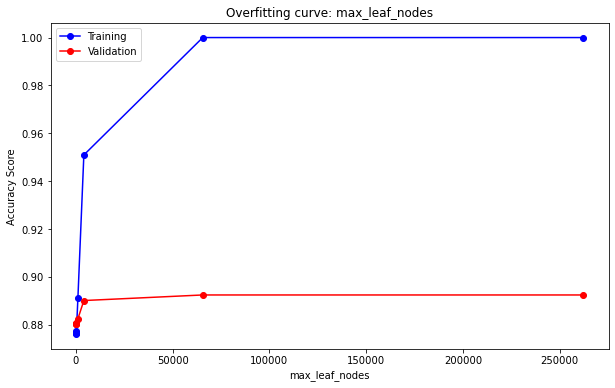

In [148]:
test_param_and_plot('max_leaf_nodes', [2**2,2**4,2**6,2**8,2**10,2**12,2**16,2**18])

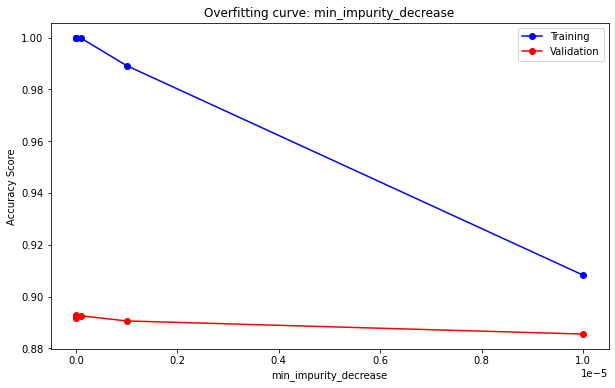

In [149]:
test_param_and_plot('min_impurity_decrease', [1e-10,1e-9,1e-8,1e-7,1e-6,1e-5])

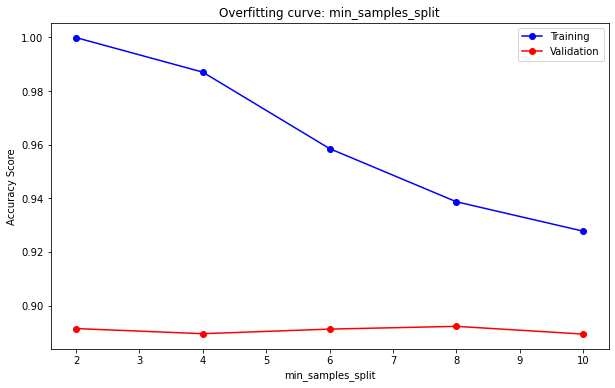

In [150]:
test_param_and_plot('min_samples_split', [2,4,6,8,10])

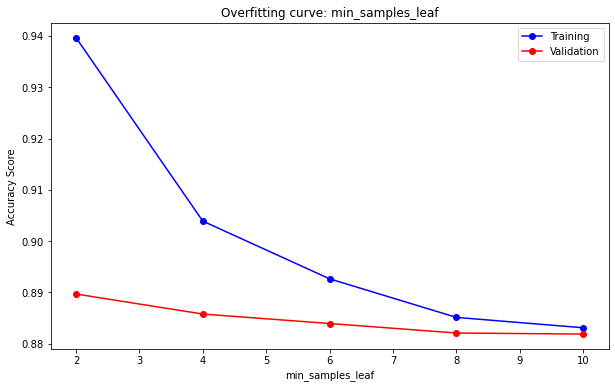

In [151]:
test_param_and_plot('min_samples_leaf', [2,4,6,8,10])

**Comments:** It seems that only n_estimators has a big impact on accuracy score.

### d. Improved Random Forest Model

In [179]:
rf2 = RandomForestClassifier(n_jobs = -1,random_state=42, n_estimators = 25);

In [180]:
%%time
rf2.fit(train_inputs,train_targets)

CPU times: user 4.16 s, sys: 19 ms, total: 4.18 s
Wall time: 2.19 s


RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=42)

Accuracy: 99.74%


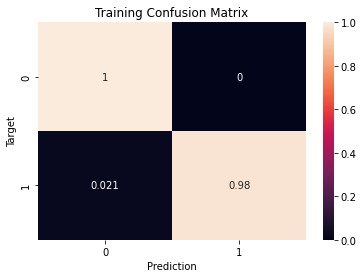

In [210]:
rf2_train_preds = predict_and_plot(train_inputs, train_targets, rf2, 'Training')

Accuracy: 89.26%


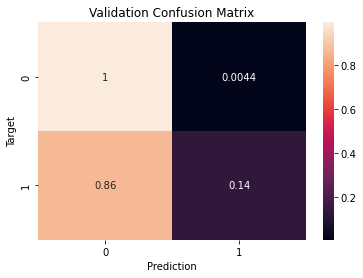

In [211]:
rf2_val_preds = predict_and_plot(val_inputs, val_targets, rf2, 'Validation')

### e. Conclusion

- Even with tuning, the accuracy score did not change much in validation set. However, the false negative went down from 0.89 to 0.86.

## 10. Conclude The Final Model

- We have several models:
    - Logistic Regression: liblinear, Newton-cg, and sag
    - Decision Tree (without tuning)
    - Improved Decision Tree
    - Random Forest (without tuning)
    - Improved Random Forest

In [213]:
summary = {
    'Model':['Logistic (liblinear)','Logistic (Newton-cg)','Logistic (sag)','Decision Tree (no tuning)', 
             'Decision Tree (tuning)','Random Forest (no tuning)','Random Forest (tuning)'],
    'Train Accuracy Score': accuracy_trains,
    'Validation Accuracy Score': accuracy_vals,
    'Train False Negative': FN_trains,
    'Validation False Negative': FN_vals
};
summary_df = pd.DataFrame(summary);
summary_df

,Model,Train Accuracy Score,Validation Accuracy Score,Train False Negative,Validation False Negative
0,Logistic (liblinear),0.876169,0.881071,0.992807,0.989697
1,Logistic (Newton-cg),0.876186,0.881071,0.992807,0.989697
2,Logistic (sag),0.876186,0.881071,0.992807,0.989697
3,Decision Tree (no tuning),1.000000,0.817086,0.000000,0.658844
4,Decision Tree (tuning),0.898674,0.901692,0.774104,0.767602
5,Random Forest (no tuning),0.999949,0.891416,0.000415,0.888952
6,Random Forest (tuning),0.997448,0.892581,0.020611,0.864911


- Based on the result above, the decision tree (with tuning) has the highest accuracy score and the lowest false negative for the validation set

**Comment:** The best model is the improved Decision Tree

### Compare with random or all_no model

In [214]:
def random_guess(inputs):
    return np.random.choice([0, 1], len(inputs))

In [215]:
def all_no(inputs):
    return np.full(len(inputs), 0)

In [216]:
ran = random_guess(val_inputs);
no_all = all_no(val_inputs);

In [217]:
tree2_ran_acc = accuracy_score(val_targets,pd.Series(ran));
print('Validation Accuracy Score for Random Guess: {}'.format(tree2_ran_acc));

Validation Accuracy Score for Random Guess: 0.4981160512434062


In [218]:
tree2_no_acc = accuracy_score(val_targets,pd.Series(no_all));
print('Validation Accuracy Score for All No Case: {}'.format(tree2_no_acc));

Validation Accuracy Score for All No Case: 0.880317873535658


**Comments:** Based on the result, before tuning, the result of Decision Tree is not good (worse than all-no case). However, with a little tuning, the result become better.

## 11. The Final Model - Feature Important

In [219]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_2.feature_importances_
}).sort_values('importance', ascending=False)

In [220]:
importance_df.head(10)

,feature,importance
2,WheelTypeID,0.701291
1,VehicleAge,0.115232
20,Auction_MANHEIM,0.096839
14,VehBCost,0.033864
5,MMRAcquisitionAuctionCleanPrice,0.013711
12,BYRNO,0.009558
13,VNZIP1,0.006025
16,WarrantyCost,0.005727
21,Auction_OTHER,0.005260
3,VehOdo,0.004956


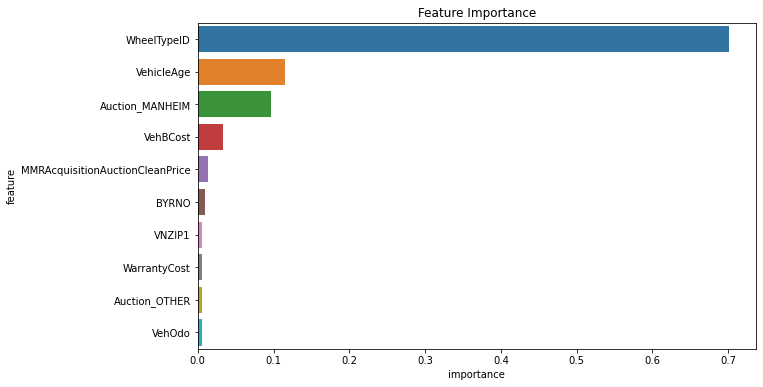

In [221]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

**Comment:** In this model, it seems that the Wheel Type is the biggest factor. Next is the vehicle Age, and followed by the auction.

## 12. Making Prediction for Test Data and Create the Submission File

In [222]:
tree2_test_preds = tree_2.predict(test_inputs[numeric_cols+encoded_cols]);
tree2_test_preds

array([0, 0, 0, ..., 0, 0, 0])

In [223]:
submission_df = pd.read_csv('./DontGetKicked/example_entry.csv')
submission_df

,RefId,IsBadBuy
0,73015,0
1,73016,0
2,73017,0
3,73018,0
4,73019,0
...,...,...
48702,121742,0
48703,121743,0
48704,121744,0
48705,121745,0


In [224]:
submission_df['IsBadBuy'] =tree2_test_preds;

In [225]:
submission_df.to_csv('submission.csv', index=False)

In [226]:
from IPython.display import FileLink
FileLink('submission.csv')

/home/jovyan/submission.csv

## 13. Save and Loading Train Model

In [227]:
import joblib

In [228]:
used_car_tree = {
    'model': tree_2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [229]:
joblib.dump(used_car_tree, 'used_car_tree.joblib')

['used_car_tree.joblib']

## 14. Future Work

- I believe the model could be more efficient if we use more columns such as Submodel or Trim.
- For some reasons, the random forest has lower performance than decision tree. Maybe I did tune wrong parameters because I believe random forest model should be better. However, the result showed the other way.

## Save Notebook

In [230]:
!pip install jovian --upgrade --quiet

In [231]:
import jovian

In [232]:
# Execute this to save new versions of the notebook
jovian.commit(project="used-car-pred-ml-project",outputs=['used_car_tree.joblib'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tylerdnguyen94/used-car-pred-ml-project" on https://jovian.ai
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/tylerdnguyen94/used-car-pred-ml-project


'https://jovian.ai/tylerdnguyen94/used-car-pred-ml-project'